In [1]:
!pip install caer canaro

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.5/809.5 kB 21.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 76.9 MB/s eta 0:00:0000:0100:01


In [2]:
import os
import caer
import canaro
import numpy as np
import cv2 as cv
import gc

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [3]:
img_size = (80, 80)
channel = 1
char_path = r'../input/the-simpsons-characters-dataset/simpsons_dataset'

In [13]:
# creating a character dictionary
char_dict = {}
for char in os.listdir(char_path):
    char_dict[char] = len(os.listdir(os.path.join(char_path, char)))
    #print(len(os.listdir(os.path.join(char_path, char))))

# sorting dict in descending order
char_dict = caer.sort_dict(char_dict, descending=True)
char_dict

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079),
 ('chief_wiggum', 986),
 ('abraham_grampa_simpson', 913),
 ('sideshow_bob', 877),
 ('apu_nahasapeemapetilon', 623),
 ('kent_brockman', 498),
 ('comic_book_guy', 469),
 ('edna_krabappel', 457),
 ('nelson_muntz', 358),
 ('lenny_leonard', 310),
 ('mayor_quimby', 246),
 ('waylon_smithers', 181),
 ('maggie_simpson', 128),
 ('groundskeeper_willie', 121),
 ('barney_gumble', 106),
 ('selma_bouvier', 103),
 ('carl_carlson', 98),
 ('ralph_wiggum', 89),
 ('patty_bouvier', 72),
 ('martin_prince', 71),
 ('professor_john_frink', 65),
 ('snake_jailbird', 55),
 ('cletus_spuckler', 47),
 ('rainier_wolfcastle', 45),
 ('simpsons_dataset', 42),
 ('agnes_skinner', 42),
 ('sideshow_mel', 40),
 ('otto_mann', 32),
 ('fat_tony', 27),
 (

In [18]:
# creating chararters list to store name
# 只取前十個
chararters = []
count = 0

for key, value in char_dict:
    count+=1
    chararters.append(key)
    if count >= 10:
        break
chararters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

In [20]:
# creating the training data
# train為一個list，內容為[tensor, label]
train = caer.preprocess_from_dir(char_path, chararters, channels=channel, IMG_SIZE=img_size, isShuffle=True)

[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] At 1000 files
[INFO] At 2000 files
[INFO] 2246 files found in 2.5795345306396484s
[INFO] At 1000 files
[INFO] 1454 files found in 0.7140624523162842s
[INFO] At 1000 files
[INFO] 1452 files found in 0.9675650596618652s
[INFO] At 1000 files
[INFO] 1354 files found in 0.5372030735015869s
[INFO] At 1000 files
[INFO] 1342 files found in 0.46292567253112793s
[INFO] At 1000 files
[INFO] 1291 files found in 0.36673998832702637s
[INFO] At 1000 files
[INFO] 1206 files found in 0.17512035369873047s
[INFO] At 1000 files
[INFO] 1194 files found in 0.13209223747253418s
[INFO] At 1000 files
[INFO] 1193 files found in 0.13123106956481934s
[INFO] At 1000 files
[INFO] 1079 files found in 0.005026817321777344s
----------------------------------------------
[INFO] 13811 files preprocessed! Took 2m 30s


In [21]:
# print the length of train data
print(f'the number of train data = {len(train)}')

the number of train data = 13811


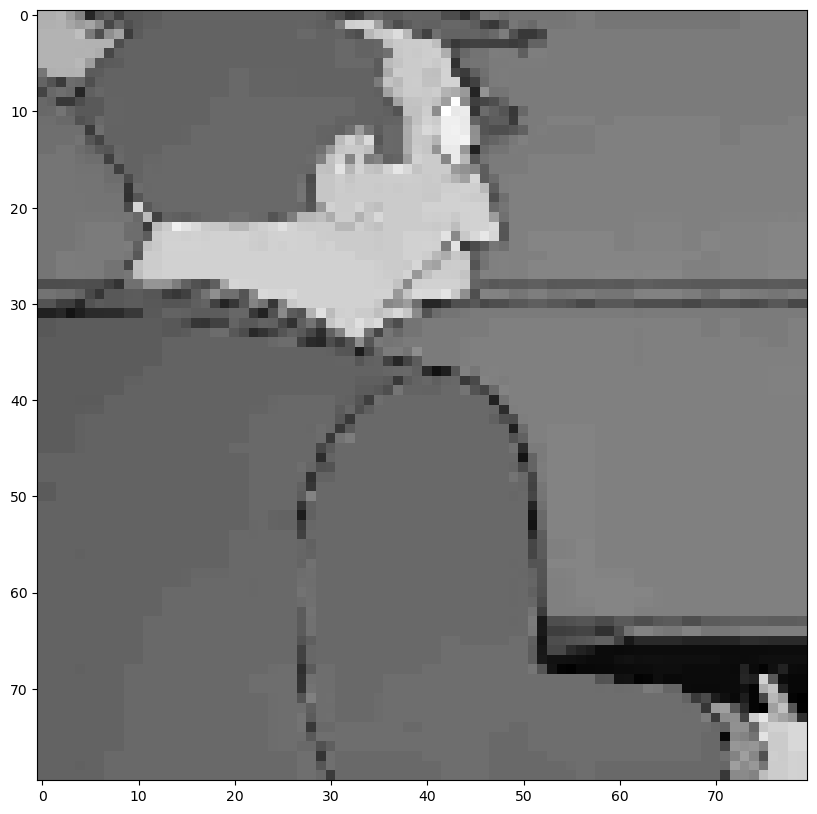

In [29]:
# plot the train data
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.imshow(train[0][0], cmap='gray')
plt.show()

In [43]:
# split train into featrure and label
featureSet, labels = caer.sep_train(train, IMG_SIZE=img_size)

In [47]:
from tensorflow.keras.utils import to_categorical

# normalize thre featureSet to the range of [0,1]
featureSet = caer.normalize(featureSet)
# 將label轉one hot encoding
labels = to_categorical(labels)

In [83]:
labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [53]:
# spliting the data to train and validation dataset
x_train, x_val, y_train, y_val = caer.train_val_split(featureSet, labels, val_ratio=.2)

print(f'the number of train data = {len(x_train)}')
print(f'the number of validation data = {len(x_val)}')

the number of train data = 11047
the number of validation data = 2764


In [55]:
BATCH_SIZE = 32
EPOCHS = 10

# creating image data generator(類似pytorch dataloader)
datagen = canaro.generators.imageDataGenerator()
train_gen = datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)

In [67]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(32,(1,1), activation='relu', input_shape=(80, 80, 1))) # 80,80,32
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(80, 80, 32))) # 78,78,32
model.add(layers.MaxPool2D((3,3), strides=(2,2))) # 39,39,32
model.add(layers.Dropout(0.2)) # 39,39,32

model.add(layers.Conv2D(64,(1,1), activation='relu', input_shape=(39, 39, 32))) # 39,39,64
model.add(layers.Conv2D(64,(3,3), activation='relu', input_shape=(39, 39, 64))) # 37,37,64
model.add(layers.MaxPool2D((2,2), strides=(2,2))) # 18,18,64
model.add(layers.Dropout(0.2)) # 18,18,64

model.add(layers.Conv2D(256,(1,1), activation='relu', input_shape=(18, 18, 64))) # 18,18,256
model.add(layers.Conv2D(256,(3,3), activation='relu', input_shape=(18, 18, 256))) # 16,16,256
model.add(layers.MaxPool2D((2,2), strides=(2,2))) # 8,8,256
model.add(layers.Dropout(0.2)) # 8,8,256

model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='sigmoid')) 

In [68]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 80, 80, 32)        64        
                                                                 
 conv2d_34 (Conv2D)          (None, 78, 78, 32)        9248      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 39, 39, 32)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 39, 39, 32)        0         
                                                                 
 conv2d_35 (Conv2D)          (None, 39, 39, 64)        2112      
                                                                 
 conv2d_36 (Conv2D)          (None, 37, 37, 64)        36928     
                                                      

In [69]:
learning_rate = 0.001
momentum = 0.9
nesterov = True
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum, nesterov=nesterov)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [70]:
# LearningRateScheduler
from tensorflow.keras.callbacks import LearningRateScheduler
callbacks_list = [LearningRateScheduler(canaro.lr_schedule)]

In [84]:
len(x_train)

11047

In [71]:
training = model.fit(train_gen,
                     steps_per_epoch = len(x_train)//BATCH_SIZE,
                     epochs = EPOCHS,
                     validation_data = (x_val, y_val),
                     validation_steps = len(y_val)//BATCH_SIZE,
                     callbacks = callbacks_list 
                    )

Epoch 1/10


2023-08-16 15:40:23.315203: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_8/dropout_20/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


345/345 [==============================] - 25s 38ms/step - loss: 0.3355 - accuracy: 0.1622 - val_loss: 0.3358 - val_accuracy: 0.1523 - lr: 0.0100
Epoch 2/10
345/345 [==============================] - 12s 35ms/step - loss: 0.3227 - accuracy: 0.1678 - lr: 0.0100
Epoch 3/10
345/345 [==============================] - 11s 33ms/step - loss: 0.3194 - accuracy: 0.1762 - lr: 0.0100
Epoch 4/10
345/345 [==============================] - 11s 33ms/step - loss: 0.3092 - accuracy: 0.2212 - lr: 0.0100
Epoch 5/10
345/345 [==============================] - 11s 33ms/step - loss: 0.3048 - accuracy: 0.2400 - lr: 0.0100
Epoch 6/10
345/345 [==============================] - 12s 36ms/step - loss: 0.3018 - accuracy: 0.2622 - lr: 0.0100
Epoch 7/10
345/345 [==============================] - 11s 33ms/step - loss: 0.2986 - accuracy: 0.2742 - lr: 0.0100
Epoch 8/10
345/345 [==============================] - 11s 33ms/step - loss: 0.2962 - accuracy: 0.2901 - lr: 0.0100
Epoch 9/10
345/345 [=============================

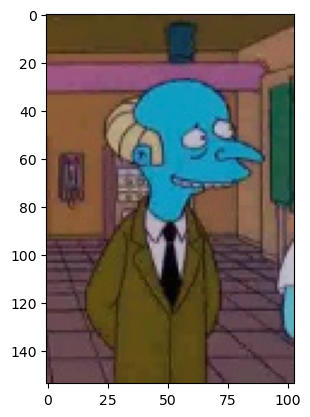

In [74]:
# testing

test_path = r'../input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/charles_montgomery_burns_0.jpg'

img = cv.imread(test_path)
plt.imshow(img, cmap='gray')
plt.show()

In [77]:
def preprocess(img):
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # 轉灰階
    img = cv.resize(img, img_size)
    img = caer.reshape(img, img_size, channel)
    return img

In [78]:
predictions = model.predict(preprocess(img))

1/1 [==============================] - 0s 361ms/step


In [81]:
# Getting class with the highest probability
print(f'the name of the testing img is {chararters[np.argmax(predictions[0])]}')

the name of the testing img is lisa_simpson


In [82]:
predictions

array([[0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        7.022454e-21, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00]], dtype=float32)